In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.stats as stats


In [3]:
apple = pd.read_csv("AppleStore.csv")



סך כל המדרגים rating_count_tot

סך כל המדרגים בגרסה האחרונה rating_count_ver

הדירוג עבור הגרסה האחרונה בלבד user_rating_ver

דירוג כללי עבור כל הגרסאות user_rating

מספר השפות הנתמכות lang.num

מספר המכשירים הנתמכים sup_devices.num


In [4]:
del apple['Unnamed: 0']
apple.head()


,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


In [5]:
a=apple.nlargest(20,'user_rating')
b =a[['track_name','rating_count_tot']]
top_track_name = a['track_name']
rating_count_tot = a['rating_count_tot']
g= rating_count_tot.sort_values()

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


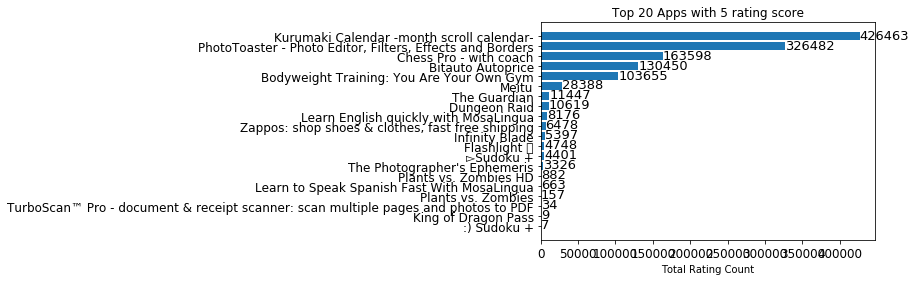

<Figure size 1080x1080 with 0 Axes>

In [6]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', which='major', labelsize=12)

ax.barh(top_track_name, g, align='center',height=0.8)


ax.set_xlabel('Total Rating Count')
ax.set_title('Top 20 Apps with 5 rating score')
plt.figure(figsize=(15,15))

for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.15, str(i.get_width()), fontsize=13)

plt.show()
ax.figure.savefig("Top 20 Apps with 5 rating score.jpg", bbox_inches='tight', dpi=600)

# By this graph you can see that having a 5 star rating is biased and is not a good parameter of evaluating the App popularity. 

height = top_rating_count_tot
bars = top_track_name
y_pos = np.arange(len(bars))
 
# Create horizontal bars
ax=plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()
plt.savefig("foo.png", bbox_inches='tight', dpi=600)

In [142]:
free = apple[apple.price==0].count()
paid = apple[apple.price>0].count()
total = apple['price'].count()
#free['price']
#apple[['prime_genre','price']]


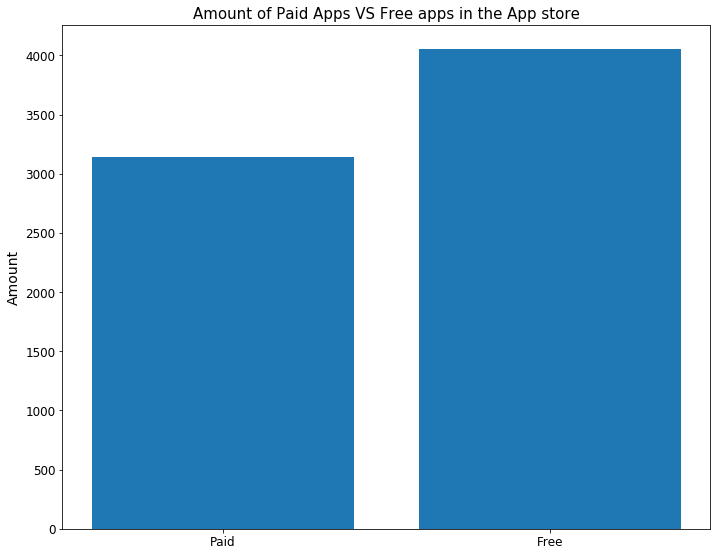

In [8]:
#V
# The Comperison of amount of Paid Apps VS Free apps in the App store
fig = plt.figure(figsize=(9,7))
ab = fig.add_axes([0,0,1,1])
labels_x = ['Paid', 'Free']
amount_y = [paid['price'],free['price']]

ab.tick_params(axis='both', which='major', labelsize=12)

ab.bar(labels_x,amount_y)

plt.title("Amount of Paid Apps VS Free apps in the App store",size=15)
plt.ylabel("Amount",size=14)
plt.savefig("Amount of Paid Apps VS Free apps in the App store.jpg", bbox_inches='tight', dpi=600)
plt.show()

In [194]:
free_ = apple[apple.price==0]
#a =apple['prime_genre'],['price']
#a=apple.groupby('prime_genre')
top_5_free_cat =free_['prime_genre'].value_counts().head()
games=top_5_free_cat['Games']
enter=top_5_free_cat['Entertainment']
photo=top_5_free_cat['Photo & Video']
social=top_5_free_cat['Social Networking']
education=top_5_free_cat['Education']
other_free_gen_price =free_['prime_genre'].value_counts().sum()-games-enter-photo-social-education

#top 5 paid categorys
paid_ = apple[apple.price>0]
top_5_paid_cat =paid_['prime_genre'].value_counts().head()

games_p=top_5_paid_cat['Games']
ed_p=top_5_paid_cat['Education']
ent_p=top_5_paid_cat['Entertainment']
pho_p=top_5_paid_cat['Photo & Video']
uti_p=top_5_paid_cat['Utilities']

other_paid_gen_price =paid_['prime_genre'].value_counts().sum()-games_p-ed_p-pho_p-ent_p-uti_p
other = other_free_gen_price+other_paid_gen_price
precentage_free = free['price']/total*100
precentage_free
precentage_paid = paid['price']/total*100
prec=[precentage_free,precentage_paid]
precentage_free.as(int)


SyntaxError: invalid syntax (<ipython-input-194-d8c646b72fc7>, line 28)

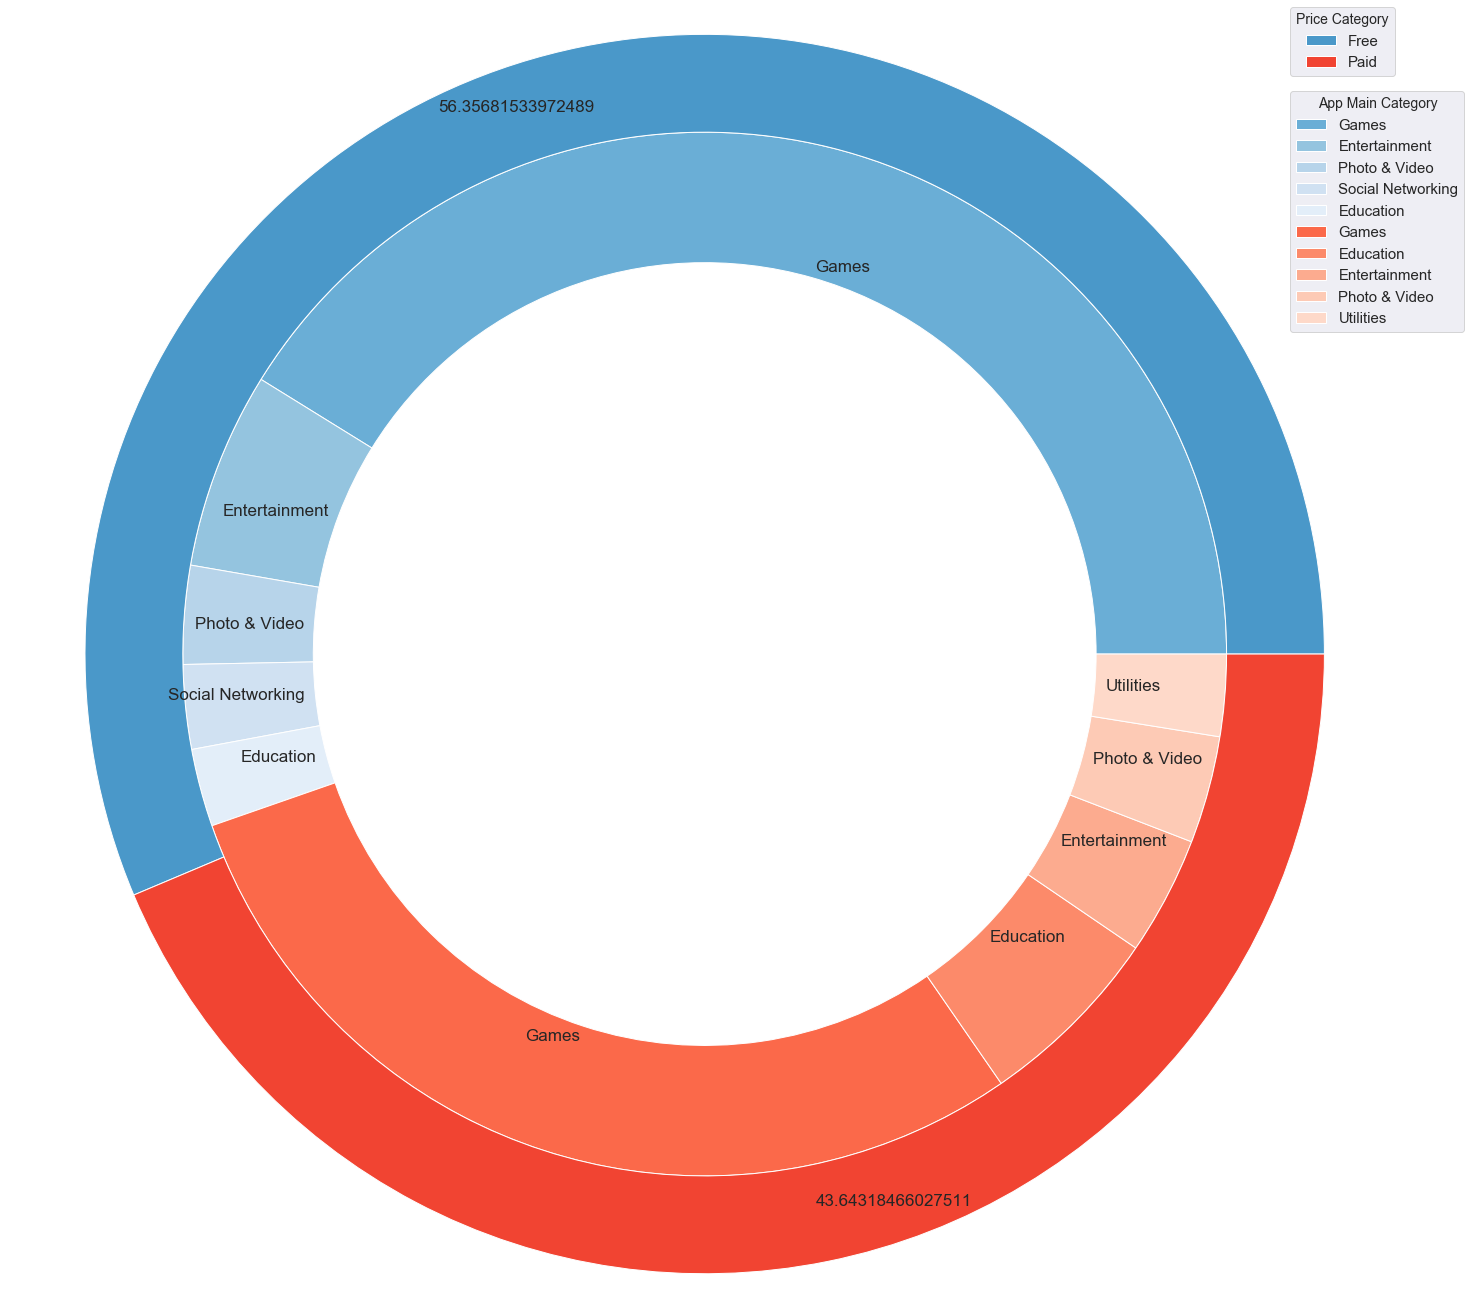

In [186]:
# Make data: I have 3 groups and 7 subgroups
group_names=['Free', 'Paid']
group_size=[free['price'],paid['price']]
subgroup_names=['Games', 'Entertainment', 'Photo & Video', 'Social Networking', 'Education','Games','Education','Entertainment','Photo & Video','Utilities']
subgroup_size=[games,enter,photo,social,education,games_p,ed_p,ent_p,pho_p,uti_p]
 
# Create colors
a, b,c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
fig, ax = plt.subplots()

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.9-0.3, labels=subgroup_names, labeldistance=0.77, colors=[a(0.5), a(0.4), a(0.3), a(0.2),a(0.1),b(0.5),b(0.4),b(0.3),b(0.2),b(0.15)],textprops={'fontsize': 17})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

leg =ax.legend(title="App Main Category",loc='upper right',title_fontsize=14, bbox_to_anchor=(1.05, 1.2),fontsize=15)

# First Ring (outside)
ax.axis('equal')
mypie, _ = ax.pie(group_size,labels=prec, labeldistance=0.9, radius=1.9, colors=[a(0.6), b(0.6)],textprops={'fontsize': 17} )
plt.setp( mypie, width=0.3, edgecolor='white')
        
#plt.axis('equal')

from matplotlib.legend import Legend
leg2 = ax.legend(mypie,group_names,title="Price Category",loc='lower right',title_fontsize=14, bbox_to_anchor=(1, 1.2),fontsize=15)
ax.add_artist(leg);

# show it
plt.show()
ax.figure.savefig("New Free vs Paid pie.jpg", bbox_inches='tight', dpi=600)




In [11]:
free_ = apple[apple.price==0]
#a =apple['prime_genre'],['price']
a=apple.groupby('prime_genre')
top_5_free_cat =free_['prime_genre'].value_counts().head()


In [12]:
apple['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

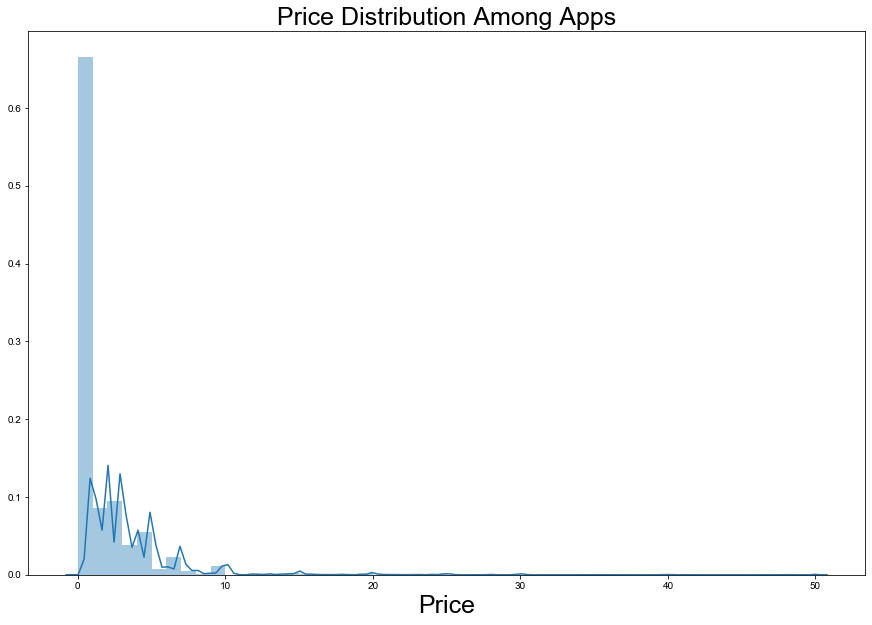

In [13]:
#V
#a=paid[paid['price']<50]
plt.figure(figsize=(15,10))

short_paid = apple[apple.price<50]
ad=sns.distplot(short_paid['price'])
ad.set_title('Price Distribution Among Apps',fontsize=25)
#ad.set_ylabel('% of all Paid Apps',fontsize=25)
ad.set_xlabel('Price',fontsize=25)
sns.set(rc={'figure.figsize':(25,15)})
ad.figure.savefig("Price Distribution Among Apps.jpg", bbox_inches='tight', dpi=600)

#avg_paid
#From this graph you can see that most paid apps are between 0 to 5 USD

In [14]:
a=apple.groupby(apple['prime_genre'])

b=a['price'].sum()

amount_of_paid_genre =a['price'].count()
amount_of_free_genre = a

a['price'].describe()


,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,57.0,5.116316,10.247031,0.0,0.0,2.99,4.99,59.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,453.0,4.028234,18.725946,0.0,0.0,2.99,2.99,299.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


TypeError: pie() missing 1 required positional argument: 'x'

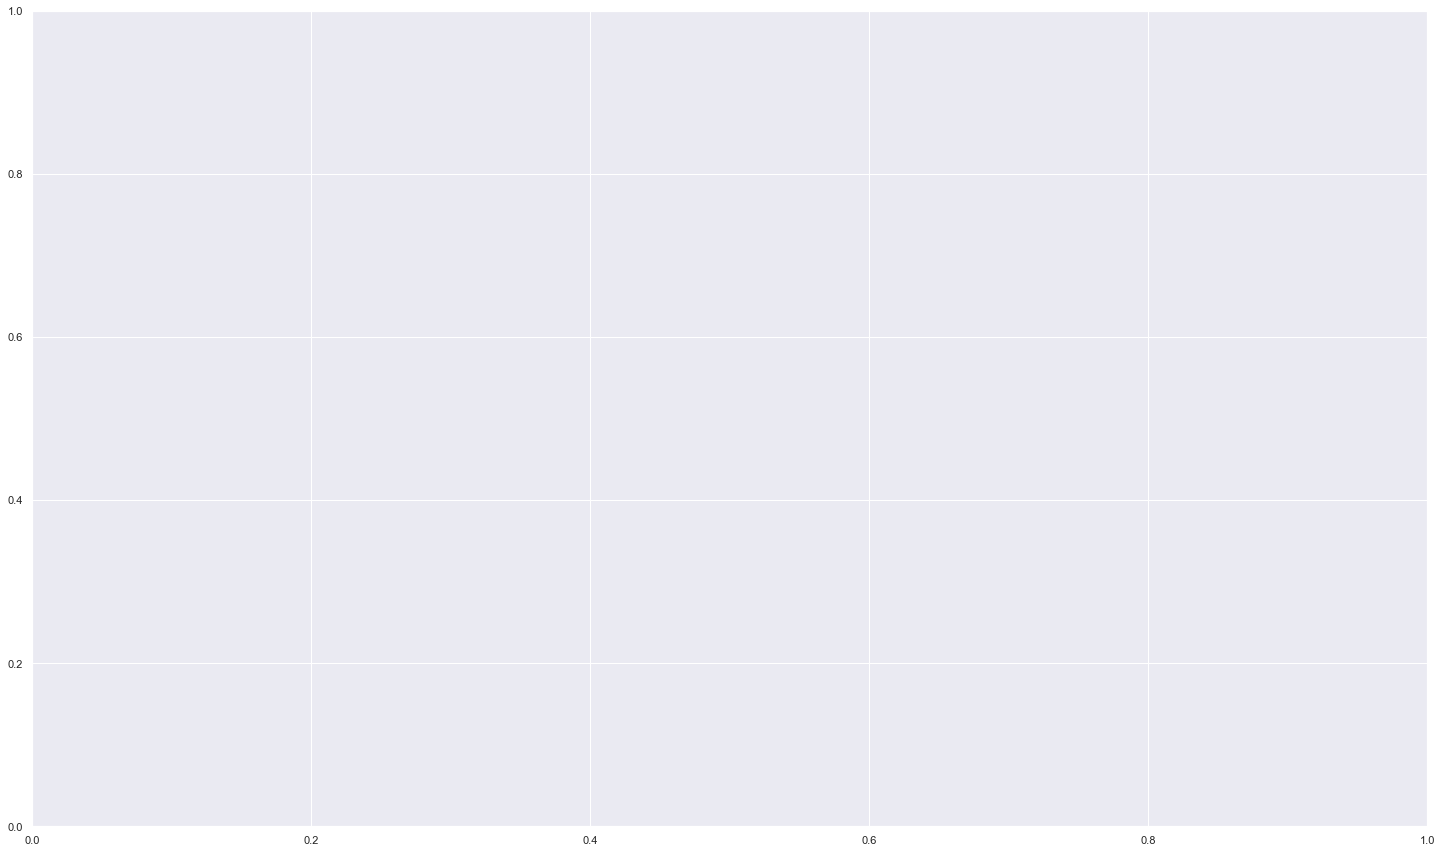

In [15]:

fig1, ax1 = plt.subplots()
ax1.pie(autopct='%1.1f%%',
         startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
#plt.legend(labels) 
plt.title("Precentage of total sum ")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2809314C8>],
      dtype=object)

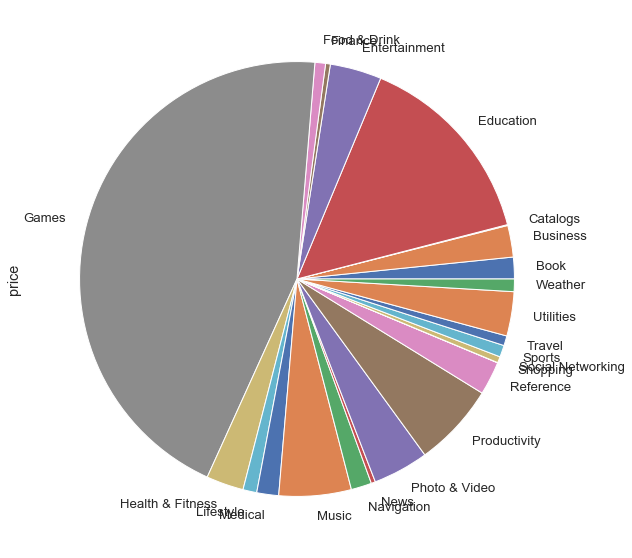

In [22]:
b.plot(kind='pie', subplots=True, figsize=(10, 10))


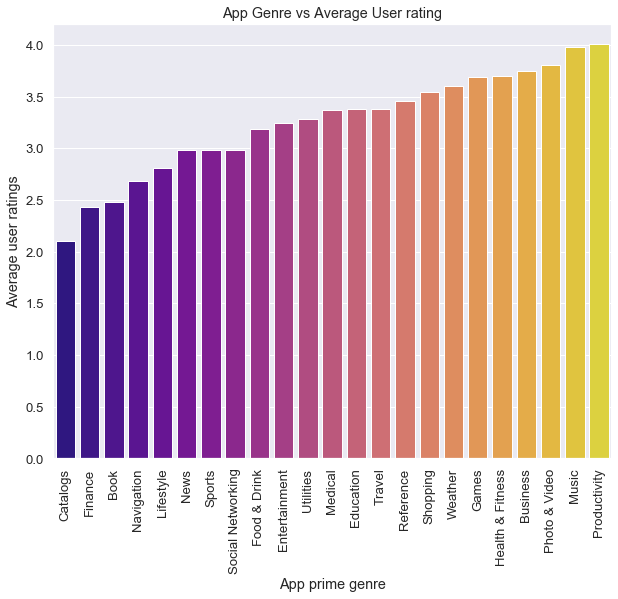

In [21]:
# V
# Getting the mean user ratings for different App genre
mean_user_ratings=apple.groupby('prime_genre')['user_rating'].mean().reset_index().sort_values(by=['user_rating'])

plt.figure(figsize = (10, 8), facecolor = None)
#sns.set_style("darkgrid")
plot = sns.barplot(x="prime_genre", y="user_rating", data=mean_user_ratings,order=mean_user_ratings['prime_genre'],palette = 'plasma')

plot.set_xticklabels(mean_user_ratings['prime_genre'], rotation=90, ha="center")
plot.set(xlabel='App prime genre',ylabel='Average user ratings')
plot.set_title('App Genre vs Average User rating')
plot.figure.savefig("App Genre vs Average User rating.jpg", bbox_inches='tight', dpi=600)
# An overview of user rating acording to App prime genre

# Now, does having paid for the app effect the user rating?


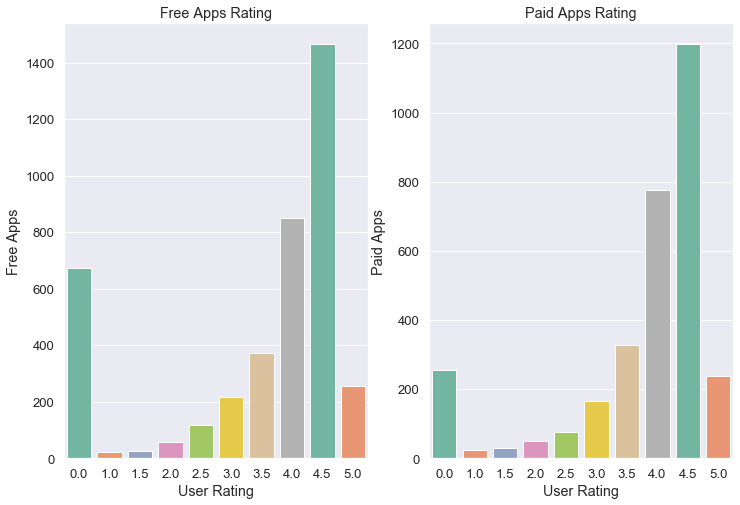

In [20]:
#V
# Now does having paid for the app effect the user rating?
free_apps=apple[apple['price']==0]
paid_apps=apple[apple['price']>0]

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
ax1=sns.countplot('user_rating',data=free_apps,palette="Set2")
plt.title('Free Apps Rating')
plt.xlabel('User Rating')
plt.ylabel('Free Apps')

plt.subplot(1,2,2)
ax2=sns.countplot('user_rating',data=paid_apps,palette="Set2")
plt.title('Paid Apps Rating')
plt.xlabel('User Rating')
plt.ylabel('Paid Apps')
plt.savefig("Free Apps Rating vs Paid Apps Rating.jpg", bbox_inches='tight', dpi=600)


15 Most Rated Apps and their genre

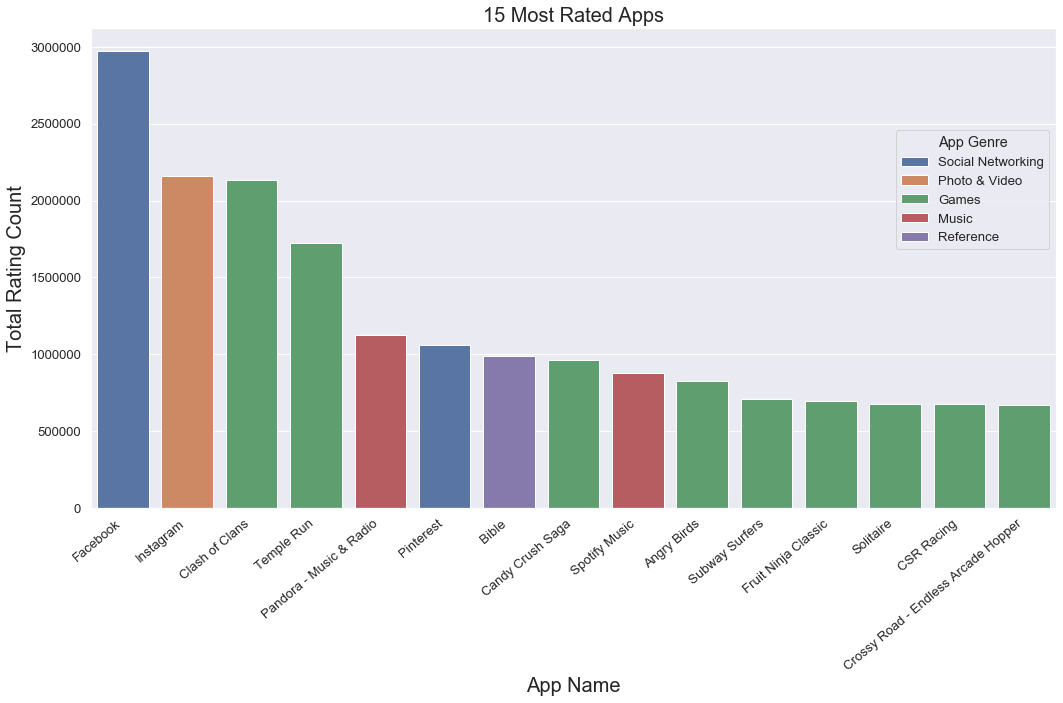

In [19]:
#V
sns.set(font_scale=1.2)  # getting the parameters slightly bigger

plt.figure(figsize=(15,10))
sorted_rating_count_tot =apple.sort_values(by='rating_count_tot',ascending=False)
most_rated_apps = sorted_rating_count_tot.head(15)
x=most_rated_apps['track_name']
y=most_rated_apps['rating_count_tot']

s=sns.barplot(x,y,hue=most_rated_apps['prime_genre'],dodge=False,)
s.legend(title="App Genre",loc='upper right', bbox_to_anchor=(1, 0.8))
plt.xlabel('App Name',fontsize=20)
plt.ylabel('Total Rating Count',fontsize=20)
plt.title('15 Most Rated Apps',fontsize=20)

#rotating the x-labels
s.set_xticklabels(s.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.savefig("15 Most Rated Apps and their genre.jpg", bbox_inches='tight', dpi=600)


In [ ]:
most_rated_apps.groupby('prime_genre').describe()